In [26]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
# Load Dataset
df = pd.read_csv("data/USvideos.csv")
df.head()


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [28]:
# Explore and Clean Dataset

print(df.shape)
print(df.columns)

# connvert dates
df["trending_date"] = pd.to_datetime(df["trending_date"], format="%y.%d.%m")
df["publish_time"] = pd.to_datetime(df["publish_time"])

# Extract useful time-based features
df["publish_hour"] = df["publish_time"].dt.hour
df["publish_day"] = df["publish_time"].dt.day_name()



(40949, 16)
Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')


In [29]:
# Engagement ratios
df["like_ratio"] = df["likes"] / (df["likes"] + df["dislikes"] + 1)
df["comment_ratio"] = df["comment_count"] / (df["views"] + 1)

df["title_length"] = df["title"].apply(len)
df["tag_count"] = df["tags"].apply(lambda x: 0 if x == "[none]" else len(x.split('|')))

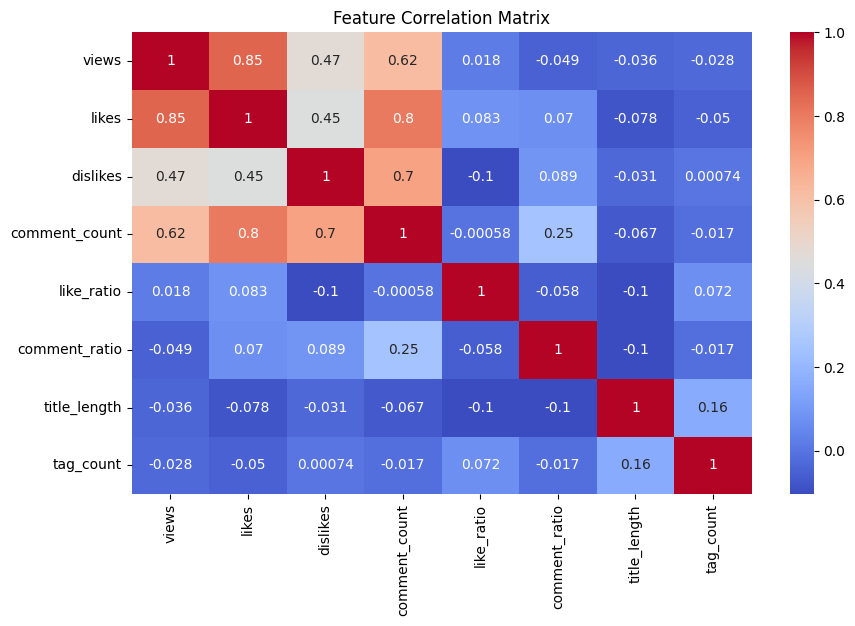

In [30]:
features = ["views", "likes", "dislikes", "comment_count", "like_ratio", "comment_ratio", "title_length", "tag_count"]
corr = df[features].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()


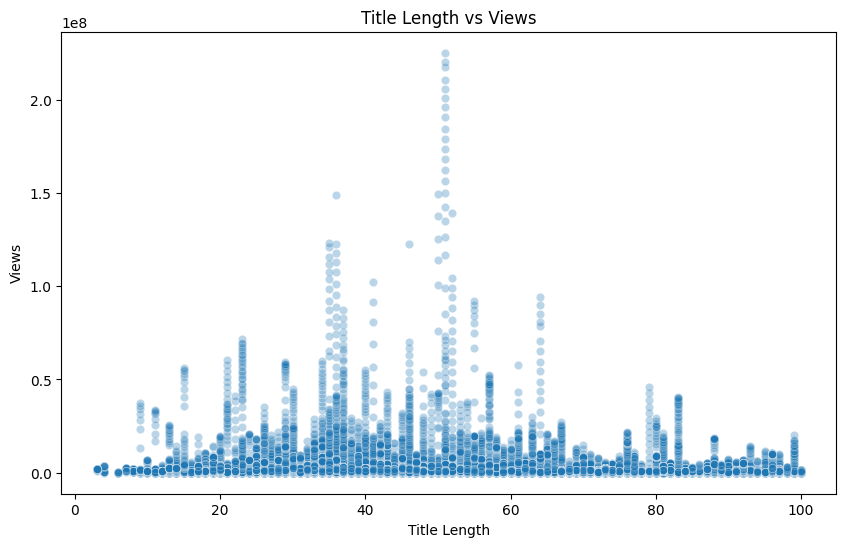

In [31]:
# Title length vs Views
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="title_length", y="views", alpha=0.3)
plt.title("Title Length vs Views")
plt.xlabel("Title Length")
plt.ylabel("Views")
plt.show()


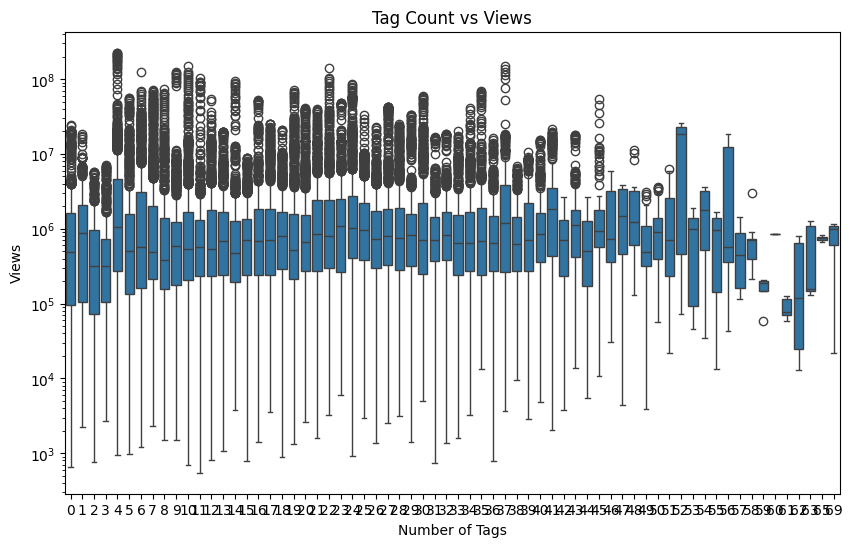

In [32]:
# Tag count vs views
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="tag_count", y="views")
plt.yscale("log")
plt.title("Tag Count vs Views")
plt.xlabel("Number of Tags")
plt.ylabel("Views")
plt.show()


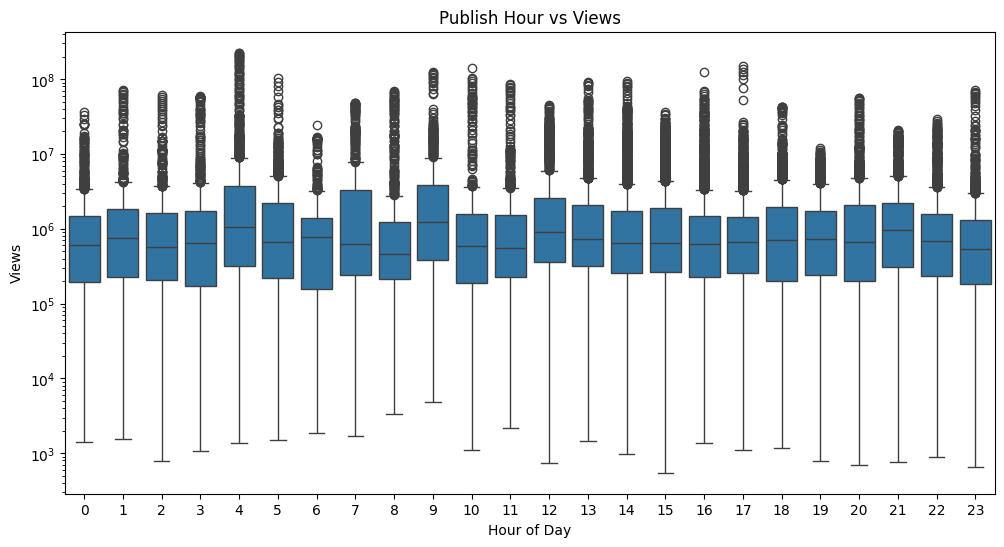

In [33]:
# Publish Hour vs Views
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="publish_hour", y="views")
plt.yscale("log")
plt.title("Publish Hour vs Views")
plt.xlabel("Hour of Day")
plt.ylabel("Views")
plt.show()


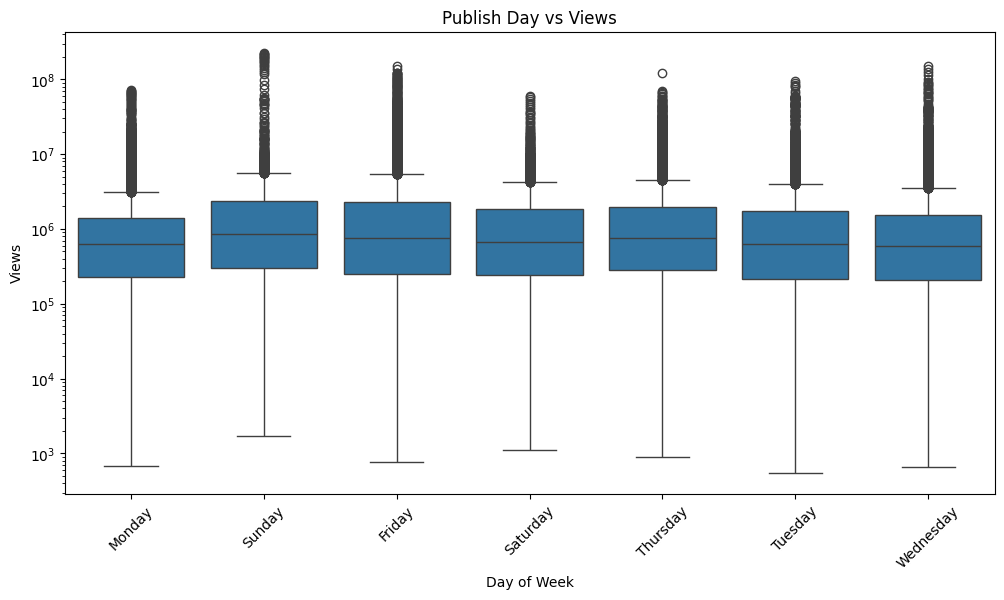

In [34]:
# Publish Day vs Views
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="publish_day", y="views")
plt.yscale("log")
plt.title("Publish Day vs Views")
plt.xlabel("Day of Week")
plt.ylabel("Views")
plt.xticks(rotation=45)
plt.show()

In [35]:
# Clickbait vs Non-Clickbait title analysis
clickbait_phrases = ['you won’t believe', 'insane', 'shocking', 'what happened next', 
    'top 10', 'top 5', 'the reason will surprise you', 
    'gone wrong', 'crazy', 'must watch', 'never seen before']

def is_clickbait(title):
    title = title.lower()
    for phrase in clickbait_phrases:
        if phrase in title:
            return True
    return False
df["is_clickbait"] = df["title"].apply(is_clickbait)
df.groupby("is_clickbait")[["views", "likes", "like_ratio", "comment_ratio"]].mean().round(2)



,views,likes,like_ratio,comment_ratio
is_clickbait,,,,
False,2372111.47,74748.1,0.93,0.0
True,1069239.46,19374.7,0.89,0.0


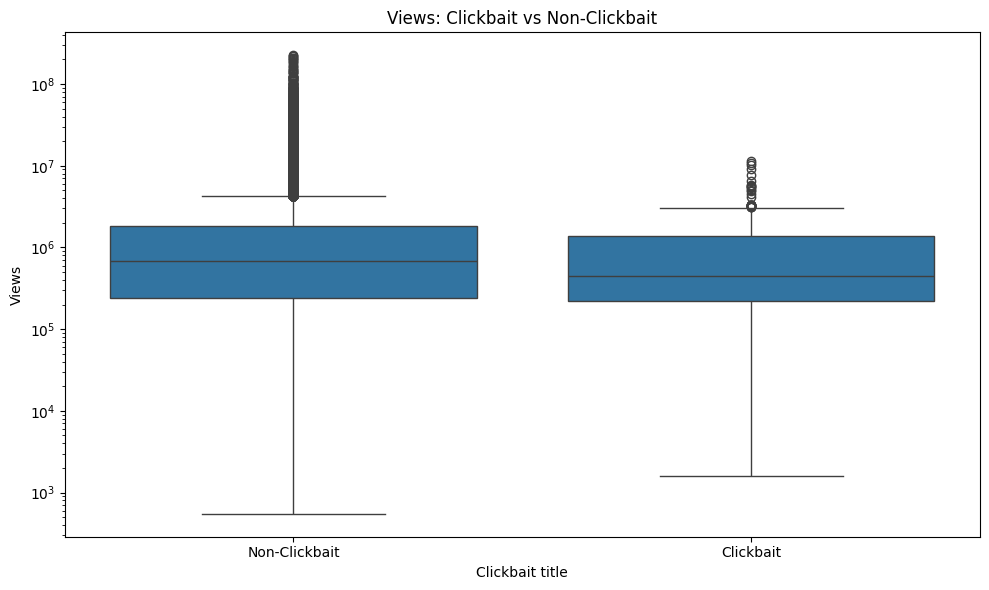

In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="is_clickbait", y="views")
plt.yscale("log")
plt.title("Views: Clickbait vs Non-Clickbait")
plt.xlabel("Clickbait title")
plt.ylabel("Views")
plt.xticks([0, 1], ["Non-Clickbait", "Clickbait"])
plt.tight_layout()
plt.show()


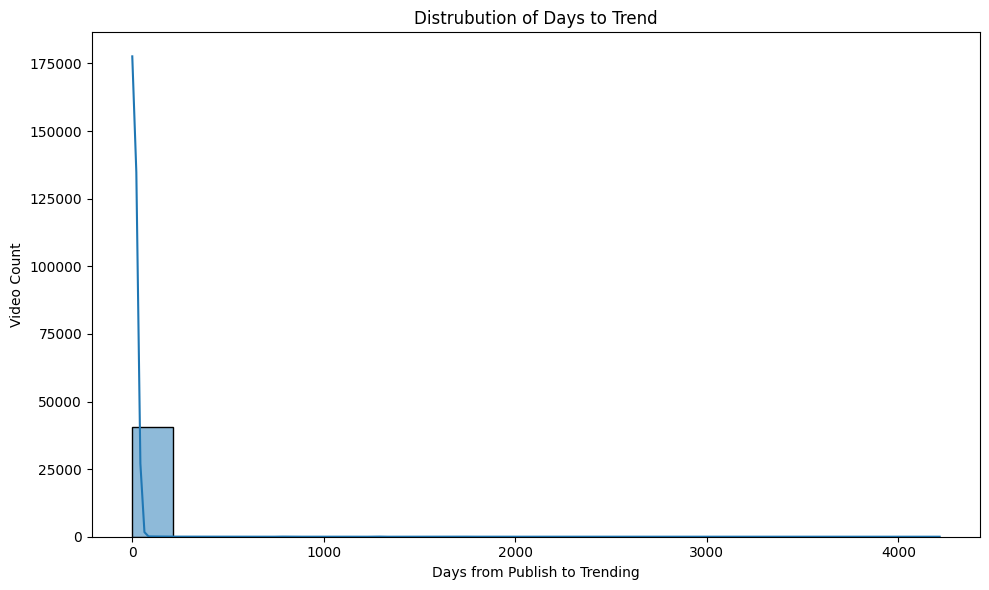

In [37]:
df["publish_time"] = pd.to_datetime(df["publish_time"])
df["trending_date"] = pd.to_datetime(df["trending_date"], format="%y.%d.%m")

df["days_to_trend"] = (df["trending_date"].dt.date - df["publish_time"].dt.date).apply(lambda x: x.days)

df = df[df["days_to_trend"] >= 0]

plt.figure(figsize=(10, 6))
sns.histplot(df["days_to_trend"], bins=20, kde=True)
plt.title("Distrubution of Days to Trend")
plt.xlabel("Days from Publish to Trending")
plt.ylabel("Video Count")
plt.tight_layout()
plt.show()



In [38]:
# Average time to trend by category
avg_trend_time = df.groupby("category_id")["days_to_trend"].mean().sort_values()
print(avg_trend_time)

category_id
29     5.385965
19     7.057214
15     7.723913
26     7.913411
23    10.107318
43    10.719298
24    13.008531
10    14.723733
22    15.685358
28    18.164098
25    18.581825
20    21.953488
17    23.455382
27    37.964976
1     41.060128
2     43.205729
Name: days_to_trend, dtype: float64


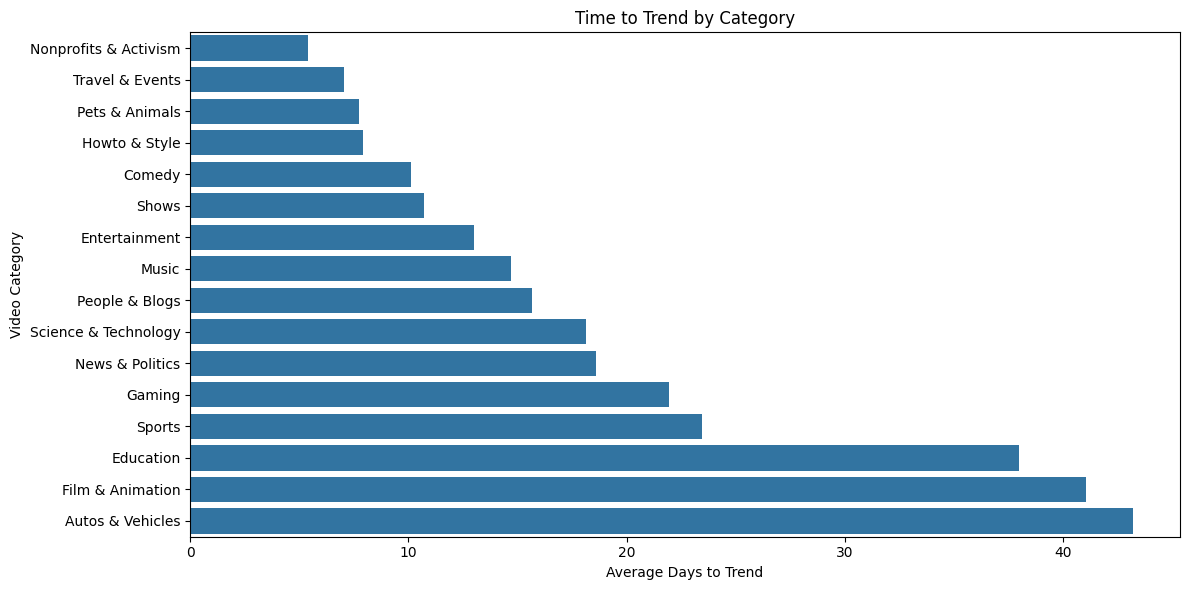

In [43]:
# Map the category id to actual category name
import json
with open("data/US_category_id.json") as f:
    categories = json.load(f)

category_mapping = {}
for item in categories["items"]:
    category_mapping[int(item["id"])] = item["snippet"]["title"]
# print(category_mapping)

df["category_name"] = df["category_id"].map(category_mapping)

avg_trend = df.groupby("category_name")["days_to_trend"].mean().sort_values()

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_trend.values, y=avg_trend.index)
plt.xlabel('Average Days to Trend')
plt.ylabel('Video Category')
plt.title('Time to Trend by Category')
plt.tight_layout()
plt.show()
